In [1]:
from FlowControl import add_to_class
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series

<h1>Softmax regression</h1>

In [2]:
from sklearn.datasets import load_iris

data_set = load_iris()

data_dict = {
    "features" : DataFrame({data_set['feature_names'][i] : data_set['data'][:,i] for i in range(len(data_set['feature_names']))}),
    "feature_names" : data_set['feature_names'],
    "targets"  : Series({"y" : data_set['target']}),
    "target_names" : data_set['target_names']
}

In [3]:
X_data = data_dict["features"][data_dict["feature_names"][0:2]].to_numpy()
y_data = data_dict["targets"]["y"]

In [4]:
def train_test_split(X_data,y_data,scale = 0.7):
    n = X_data.shape[0]
    rng = np.random.default_rng(42)
    inds = rng.choice(n,int(scale * n))
    inds_prime = np.array([i for i in range(n) if i not in set(inds)])
    return X_data[inds],X_data[inds_prime],y_data[inds],y_data[inds_prime]

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,scale = 0.7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 2)
(75, 2)
(105,)
(75,)


<h2>1. Theroetical introduction</h2>

Let's assume that we analyze a set of data in which there are $K$ classes. If they are linearly separated, then we can try to classify them using simple classifier "one versus others". Our model will be described by $K$ vectors: $\vec{\omega}^{(k)}$. If $\vec{\omega}^{(k)}\cdot \vec{x} = 0 $ is a hyperplane between elements from class $k$ and others, then we can assume that the probability for classifying object as $k$ is proportional to:
$$
p(y = k | \vec{x};\vec{\omega}^{(k)}) \propto \exp(\vec{\omega}^{(k)}\cdot \vec{x})
$$
In order to obtain valid probability distribution, we have to normalize the above factor by a **partition function**:
$$
\mathcal{Z}(\{\vec{\omega}^{(k)}\}) = \sum_{k=1}^{K}\exp(\vec{\omega}^{(k)}\cdot \vec{x})
$$
$\vec{\omega}^{(k)}$ is a vector orthogonal to division plane, therefore for vectors on the "classified" side of the plane, proibability is very big, and for others is very small. At the boundary it is equal to $1/K$ therefore we can't make any reasonable prediction.

For the total set of data:
$$
P(\hat{y}|X;\{\vec{\omega}^{(k)}\}) = \prod_{i=1}^{n}p(\hat{y}^{(i)} | \vec{x}^{(i)}; \{\vec{\omega}^{(k)}\})
$$

We choose the Cost function as:
$$
\mathcal{L}(\{\vec{\omega}^{(k)}\}) = -\sum_{i=1}^{n}\sum_{k=1}^{K}\delta_{\hat{y}^{(i)}k}\log{(e^{\vec{\omega}^{(k)}\cdot \vec{x}^{(i)}}/\mathcal{Z}(\{\vec{\omega}^{(k)}\},\vec{x}^{(i)}))}
$$

$$
\vec{\nabla}_{\vec{\omega}^{(s)}}\mathcal{Z}(\{\vec{\omega}^{(k)}\},\vec{x}^{(i)}) = e^{\vec{\omega}^{(s)}\cdot \vec{x}^{(i)}}\vec{x}^{(i)}
$$

$$
\vec{\nabla}_{\vec{\omega}^{(s)}}\mathcal{L}(\{\vec{\omega}^{(k)}\}) = - \sum_{i=1}^{n}\sum_{k=1}^{K}\delta_{\hat{y}^{(i)}k}\frac{\mathcal{Z}(\{\vec{\omega}^{(k)}\})}{e^{\vec{\omega}^{(k)}\cdot \vec{x}^{(i)}}}(\delta_{sk}e^{\vec{\omega}^{(k)}\cdot \vec{x}^{(i)}}\vec{x}^{(i)} \frac{1}{\mathcal{Z}(\{\vec{\omega}^{(k)}\})}- \frac{1}{\mathcal{Z}(\{\vec{\omega}^{(k)}\})^{2}}e^{\vec{\omega}^{(s)}\cdot \vec{x}^{(i)}}e^{\vec{\omega}^{(k)}\cdot \vec{x}^{(i)}}\vec{x}^{(i)})=
$$

$$
= - \sum_{i=1}^{n}(\delta_{\hat{y}^{(i)}s} - \frac{e^{\vec{\omega}^{(s)}\cdot \vec{x}^{(i)}}}{\mathcal{Z}(\{\vec{\omega}^{(k)}\})})\vec{x}^{(i)}
$$

Learning algorithm:

For each $\vec{\omega}^{(s)}$, where $s\in \{1,\ldots,K\}$ update vector as:
$$
\vec{\omega}^{(s)} = \vec{\omega}^{(s)} + \alpha \sum_{i=1}^{n}(\delta_{\hat{y}^{(i)}s} - \exp(\vec{\omega}^{(s)}\cdot \vec{x}^{(i)})/\mathcal{Z}(\{\vec{\omega}^{(k)}\}))\vec{x}^{(i)}
$$

In a matrix form: 
$$
\Omega = \left[
\begin{array}{ccc}
| &  & | \\
\vec{\omega}^{(1)} &\ldots & \vec{\omega}^{(K)} \\
| &  & | \\
\end{array}
\right] \hspace{2cm}
X = \left[
\begin{array}{ccc}
- & (\vec{x}^{(1)})^{T} & - \\
- & \ldots & -  \\
- & (\vec{x}^{(n)})^{T} & - \\
\end{array}
\right]
$$

Partition function can be evaluated in a following way:
$$
\mathcal{Z}(\{\vec{\omega}^{(k)}\},X) = \sum_{k=1}^{K}\exp(\vec{\omega}^{(k)}\cdot \vec{x}^{i}) = \text{sum}_{columns}(\exp(X\Omega))
$$

<h2>2. Implementation</h2>

In [6]:
class SoftMaxRegression_:
    def __init__(self,k_folds,alpha = 0.01,steps = 10000):
        self.alpha = alpha
        self.steps = steps
        self.k_ = k_folds

    def fit(self,X,y,seed = 42,collect_data = False,scale_features = False):
        #default setting : Stochastic gradient descent
        raise NotImplementedError

    def batch_grad(self,X,y,B):
        raise NotImplementedError
    
    def Cost_function(self,X,y):
        raise NotImplementedError
    
    def PreProcessing(self,X,y):
        raise NotImplementedError

In [7]:
@add_to_class(SoftMaxRegression_)
def fit(self,X,y,seed = 42,collect_data = False,scale_features = False):
    assert isinstance(X,np.ndarray) , "Invalid input datatype for X"
    assert isinstance(y,np.ndarray) , "Invalid input datatype for y"

    if len(X.shape) == 1:
        n = X.shape
        d = 1
    else:
        n,d = X.shape

    X_prime,means_x,stds_x = self.PreProcessing(X,scale_features)
    X_bias = np.hstack((X_prime,np.ones(n).reshape(-1,1)))
    y_prime = self.precompute_y(y)

    rng = np.random.default_rng(seed)
    self.w_ = rng.normal(loc = 0. , scale = 0.1,size = (d+1)*self.k_).reshape((d+1),self.k_)
    L_data = []

    for _ in range(self.steps):
        if collect_data:
            L_data.append(self.Cost_function(X_bias,y_prime))
        self.w_ += self.alpha / n * self.grad(X_bias,y_prime)
        
    self.rescale_features(means_x,stds_x,scale_features)
    if collect_data:
        return self.w_,L_data
    else:
        return self.w_

@add_to_class(SoftMaxRegression_)
def rescale_features(self,means_x,stds_x,scale_features = True):
    if scale_features:
        self.w_[-1] = self.w_[-1] - sum(means_x * self.w_[:-1] /stds_x)
        self.w_[:-1] = self.w_[:-1] / stds_x
    
@add_to_class(SoftMaxRegression_)
def PreProcessing(self,X,scale_features = True):
    means_x = np.mean(X,axis = 0)
    stds_x = np.std(X,axis = 0)

    if scale_features:
        return (X-means_x)/stds_x,means_x,stds_x
    else:
        return X, means_x,stds_x

@add_to_class(SoftMaxRegression_)
def grad(self,X,y_prime):
    Z_c = np.sum(np.exp(X @ self.w_),axis=1)
    pat1 = np.exp(X @ self.w_) / Z_c[:,np.newaxis]
    pat2 = X.T @ (y_prime - pat1)
    return pat2

@add_to_class(SoftMaxRegression_)
def precompute_y(self,y):
    return np.vstack([np.where(y == s,1.,0.) for s in range(self.k_)]).T

@add_to_class(SoftMaxRegression_)
def Cost_function(self,X,y_prime):
    Z_c = np.sum(np.exp(X @ self.w_),axis=1)
    pat1 = np.exp(X @ self.w_) / Z_c[:,np.newaxis]
    return -np.trace(y_prime @ (np.log(pat1)).T)

@add_to_class(SoftMaxRegression_)
def predict(self,X_test):
    n = X_test.shape[0]
    X_bias = np.hstack((X_test,np.ones(n).reshape(-1,1)))
    Z_c = np.sum(np.exp(X_bias @ self.w_),axis=1)
    prob = np.exp(X_bias @ self.w_) / Z_c[:,np.newaxis]
    return np.argmax(prob,axis = 1)

In [8]:
model_SM = SoftMaxRegression_(alpha=1e-2,steps=100000,k_folds=3)
w_t , L_d = model_SM.fit(X_train,y_train,seed = 42,collect_data = True,scale_features = False)

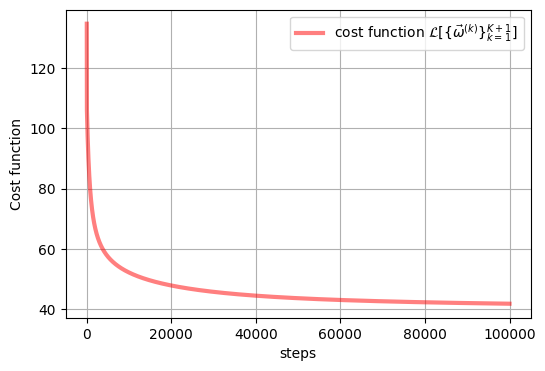

In [9]:
fig = plt.figure(figsize = (6,4))

ax = fig.add_subplot()
ax.grid(True)
ax.set_xlabel("steps")
ax.set_ylabel("Cost function")
ax.plot(L_d,lw = 3,color = "red",alpha = 0.5,label = "cost function " + r"$\mathcal{L}[\{\vec{\omega}^{(k)}\}_{k=1}^{K+1}]$")
ax.legend()

plt.show()             

In [10]:
x0_ = np.arange(1.5,5,0.01)
x1_ = np.arange(4,8.5,0.01)
x0,x1 = np.meshgrid(x0_,x1_)
X = np.stack((x1[:,:],x0[:,:]),axis = 2).reshape(-1,2)

y_pred_total = model_SM.predict(X).reshape(len(x1_),len(x0_))


In [11]:
colormap_theme = "viridis"

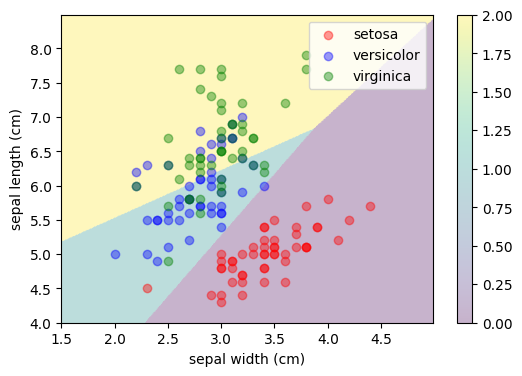

In [12]:
colors = ["red","blue","green"]
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot()
im = ax.imshow(y_pred_total,origin="lower",aspect = 'auto',alpha = 0.3,extent=[x0_.min(),x0_.max(),x1_.min(),x1_.max()],cmap = colormap_theme)
for i in range(3):
    ax.scatter(X_data[y_data == i,1],X_data[y_data == i,0],color = colors[i],alpha = 0.4,label = data_dict["target_names"][i])
ax.set_xlabel(data_dict["feature_names"][1])
ax.set_ylabel(data_dict["feature_names"][0])

fig.colorbar(im,ax = ax)
ax.legend()
plt.show()

In [13]:
def fetch_fitted(ax,m,n):
    X_data = data_dict["features"][[m,n]].to_numpy()
    y_data = data_dict["targets"]["y"]
    x0_data = data_dict["features"][m].to_numpy()
    x1_data = data_dict["features"][n].to_numpy()

    X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,scale = 0.7)
    model_SM = SoftMaxRegression_(alpha=1e-2,steps=100000,k_folds=3)
    w_t  = model_SM.fit(X_train,y_train,seed = 42,collect_data = False,scale_features = False)

    x0_ = np.arange(np.min(x0_data) - 0.5,np.max(x0_data) + 0.5 ,0.01)
    x1_ = np.arange(np.min(x1_data) - 0.5,np.max(x1_data) + 0.5 ,0.01)
    x0,x1 = np.meshgrid(x0_,x1_)
    X = np.stack((x0[:,:],x1[:,:]),axis = 2).reshape(-1,2)

    y_pred_total = model_SM.predict(X).reshape(len(x1_),len(x0_))
    ax.imshow(y_pred_total,origin="lower",aspect = 'auto',alpha = 0.3,extent=[x0_.min(),x0_.max(),x1_.min(),x1_.max()],cmap = colormap_theme)

def show_iris_fitted(fig,data_dict):
    colors = ["red","blue","green"]
    fig.suptitle("Iris dataset with softmax analysis")
    ft_num = len(data_dict["features"].keys())
    for i in range(ft_num**2):
        ax = fig.add_subplot(ft_num,ft_num,i+1)
        ax.grid(True)
        m = data_dict["feature_names"][i // 4]
        n = data_dict["feature_names"][i % 4]
        fetch_fitted(ax,m,n)
        for j in range(len(data_set["target_names"])):
            inds = (data_dict["targets"]["y"] == j)
            x0 = data_dict["features"].iloc[inds][m]
            x1 = data_dict["features"].iloc[inds][n]
            ax.scatter(x0,x1,color = colors[j],alpha = 0.4)
            ax.set_xlabel(m)
            ax.set_ylabel(n)

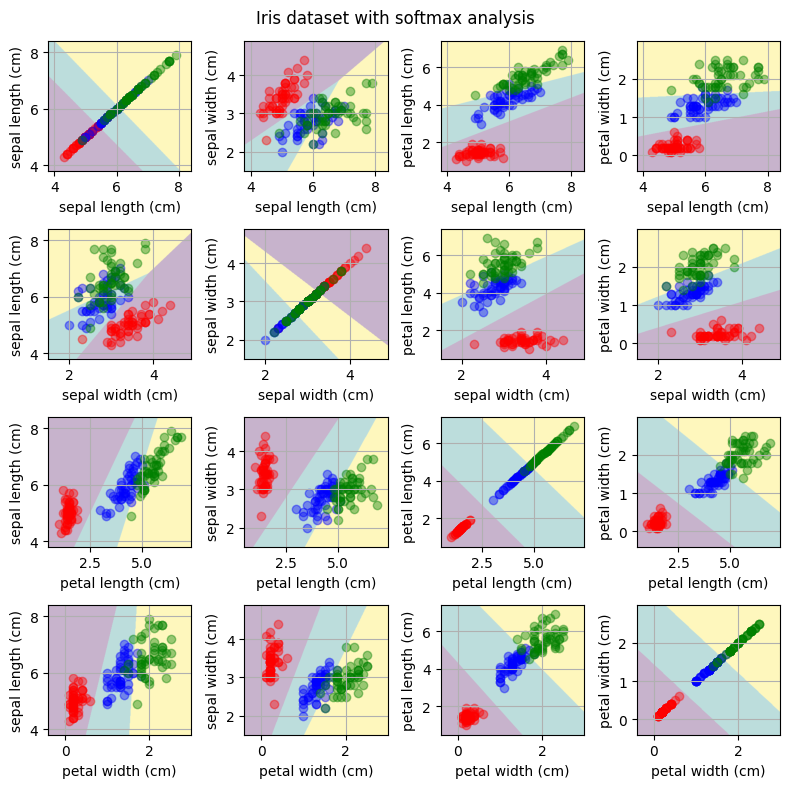

In [14]:
fig = plt.figure(figsize = (8,8))
show_iris_fitted(fig,data_dict)
plt.tight_layout()